# Manually implementating Deep Q with Image Data

little show of approaches for the next lecture

**imports**

In [2]:
# in conda env terminal:
# pip install pillow
from PIL import Image

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import gym
from gym.utils import play

In [4]:
from rl.core import Processor
from rl.memory import SequentialMemory

C:\Users\tobia\AppData\Roaming\Python\Python39\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
c:\Users\tobia\.conda\envs\ai\lib\site-packages\keras_preprocessing\image\utils.py:23: DeprecationWarning: NEAREST is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.NEAREST or Dither.NONE instead.
  'nearest': pil_image.NEAREST,
c:\Users\tobia\.conda\envs\ai\lib\site-packages\keras_preprocessing\image\utils.py:24: DeprecationWarning: BILINEAR is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.BILINEAR instead.
  'bilinear': pil_image.BILINEAR,
c:\Users\tobia\.conda\envs\ai\lib\site-packages\keras_preprocessing\image\utils.py:25: DeprecationWarning: BICUBIC is depreca

**setup env**

In [5]:
env = gym.make("Breakout-v0")

C:\Users\tobia\AppData\Roaming\Python\Python39\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
c:\Users\tobia\.conda\envs\ai\lib\site-packages\gym\envs\registration.py:593: UserWarning: WARN: The environment Breakout-v0 is out of date. You should consider upgrading to version `v4`.
  logger.warn(
c:\Users\tobia\.conda\envs\ai\lib\site-packages\gym\core.py:329: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
c:\Users\tobia\.conda\envs\ai\lib\site-packages\gym\wrappers\step_api_compatibility.py:39: DeprecationWarning: WARN: Initializi

In [6]:
#play.play(env, zoom=3)

**hyperparameters**

In [18]:
WINDOW_LENGTH = 3
IMG_SHAPE = (84, 84)    # from (210, 160, 3)

C:\Users\tobia\AppData\Roaming\Python\Python39\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


**replay buffer**

In [8]:
from collections import deque

In [9]:
np.random.seed(42)
env.reset()

sequential_frame_buffer = []

temp_sequential_frames = deque(maxlen=WINDOW_LENGTH)

for i in range(10):
    if i == 1:
        action = 1
    else:
        action = 3

    observation, reward, done, info = env.step(action)

    if len(temp_sequential_frames) == WINDOW_LENGTH:
        sequential_frame_buffer.append(list(temp_sequential_frames))
        
    temp_sequential_frames.append(observation)
env.close()

c:\Users\tobia\.conda\envs\ai\lib\site-packages\gym\utils\passive_env_checker.py:227: DeprecationWarning: WARN: Core environment is written in old step API which returns one bool instead of two. It is recommended to rewrite the environment with new step API. 
  logger.deprecation(


In [10]:
# have to wait WINDOW_LENGTH steps, before saving the buffer
len(sequential_frame_buffer)

7

In [11]:
len(sequential_frame_buffer[0])

3

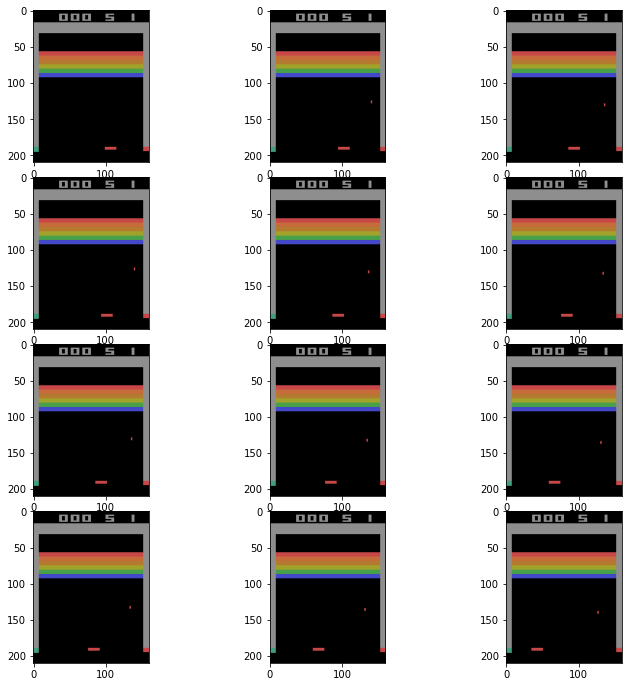

In [17]:
%matplotlib inline

n_img = 4

fig, axes = plt.subplots(n_img, WINDOW_LENGTH, figsize=(12, 12))

for global_index, timestep in enumerate(sequential_frame_buffer[:n_img]):
    for frame_index, frame in enumerate(timestep):
        axes[global_index][frame_index].imshow(frame)

fig.subplots_adjust(wspace=0.2, hspace=0.1)

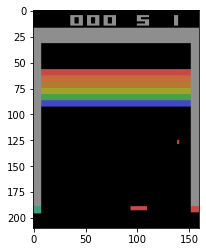

In [13]:
%matplotlib inline

plt.imshow(sequential_frame_buffer[0][1])

In [ ]:
# or in one line:
memory = SequentialMemory(limit=1000, window_length=WINDOW_LENGTH)

**image preprocessing**

In [19]:
class BreakOutProcessor(Processor):
    # important overwriting
    def process_observation(self, observation):
        # array --> Image wit PIL
        img = Image.fromarray(observation)

        img = img.resize(IMG_SHAPE)

        img = img.convert('L')

        return np.array(img)

C:\Users\tobia\AppData\Roaming\Python\Python39\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


**showcase**

In [20]:
sample_images = []
breakout_proc = BreakOutProcessor()
env.reset()

for steps in range(200):
    action = env.action_space.sample()
    observation, reward, done, info = env.step(action)
    process_observation = breakout_proc.process_observation(observation)
    sample_images += [process_observation]

C:\Users\tobia\AppData\Roaming\Python\Python39\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [22]:
sample_images[-1].shape

C:\Users\tobia\AppData\Roaming\Python\Python39\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(84, 84)

C:\Users\tobia\AppData\Roaming\Python\Python39\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


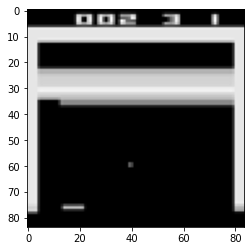

In [25]:
%matplotlib inline

plt.imshow(sample_images[-1], cmap='gray')